In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False
import os

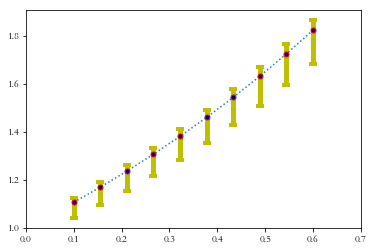

In [2]:
#==============================================================================
# 4.1 误差棒图
#==============================================================================
# # #散点图的误差棒图
x = np.linspace(0.1,0.6,10)
y = np.exp(x)
error = 0.05 + 0.15*x
lower_error = error
upper_error = 0.3*error
error_limit = [lower_error,upper_error]
plt.errorbar(x,y,yerr=error_limit,fmt=':o',
             ecolor='y',elinewidth=5,ms=5,mfc='darkblue',mec='red',capthick=4,capsize=4)
plt.xlim(0,0.7)
#plt.savefig('误差棒.pdf')
plt.show()

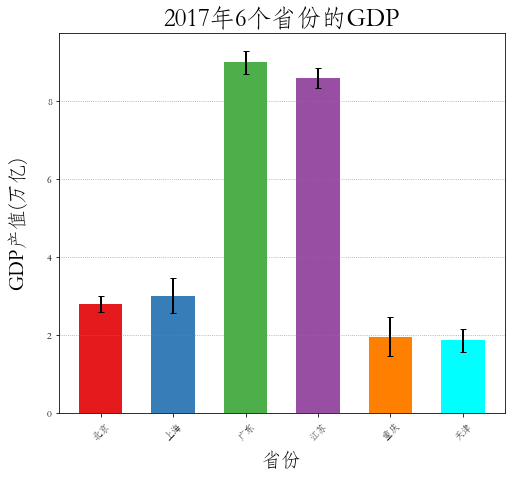

In [3]:
# # #柱状图的误差棒图
GDP = pd.read_excel('Province GDP 2017.xlsx')
std_err = [0.2,0.45,0.3,0.26,0.5,0.3]
error_attri = dict(elinewidth=2,ecolor='black',capsize=3)
colors= ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#00FFFF']
fig =plt.figure(figsize=(8,7)) # 创建画布
plt.bar(GDP.index.values,GDP.GDP,width=0.6,align='center',yerr=std_err,error_kw=error_attri,color= colors,
        tick_label=GDP.Province)
plt.xticks(rotation=45)
plt.xlabel('省份',fontsize = 20,labelpad =10)
plt.ylabel('GDP产值(万亿)',fontsize = 20,labelpad =20)
plt.grid(True,axis='y',ls=':',color='gray',alpha=0.8)
plt.title('2017年6个省份的GDP',fontsize = 25)
plt.show()

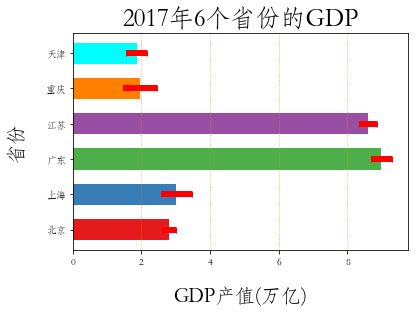

In [4]:
# # #条形图的误差棒图
bar_width =0.6
colors= ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#00FFFF']
std_err = [0.2,0.45,0.3,0.26,0.5,0.3]
error_attri = dict(elinewidth=6,ecolor='red',capsize=3)
plt.barh(y =GDP.index.values,width = GDP.GDP,height=bar_width,align='center',xerr=std_err,color = colors,
        tick_label=GDP.Province,error_kw=error_attri)
plt.xlabel('GDP产值(万亿)',fontsize = 20,labelpad =20)
plt.ylabel('省份',fontsize = 20,labelpad =20)
plt.grid(True,axis='x',ls=':',color='darkorange',alpha=0.8)
plt.title('2017年6个省份的GDP',fontsize = 25)
plt.show()


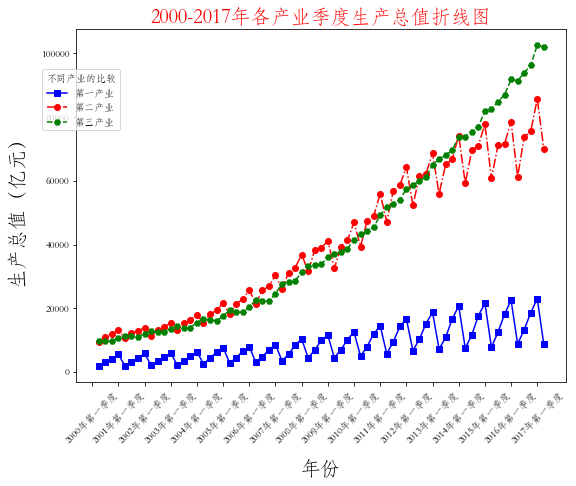

In [5]:
#==============================================================================
# 4.2 图例和画布使用
#==============================================================================
data = np.load('国民经济核算季度数据.npz')
name = data['columns'] ## 提取其中的columns数组，视为数据的标签
values = data['values']## 提取其中的values数组，数据的存在位置
fig =plt.figure(figsize=(8,7)) # 创建画布
ax = fig.add_axes([0.10,0.2,0.85,0.7]) # Axes是画布上的绘图区域，可以添加多块
plt.plot(values[:,0],values[:,3],'bs-',label='第一产业')
plt.plot(values[:,0],values[:,4],'ro-.',label='第二产业')
plt.plot(values[:,0],values[:,5],'gH--',label='第三产业')## 绘制折线图
plt.xlabel('年份',labelpad=15,fontsize=20)## 添加横轴标签
plt.ylabel('生产总值（亿元）',labelpad=15,fontsize=20,style='oblique')## 添加y轴名称
plt.xticks(range(0,70,4),values[range(0,70,4),1],rotation=45)
plt.title('2000-2017年各产业季度生产总值折线图',fontsize=20,color='red')## 添加图表标题
plt.legend(loc='upper right',bbox_to_anchor=(0.10,0.9),ncol=1, frameon=True, #是否要边框
           title ='不同产业的比较',shadow=False, fancybox=True)
# plt.savefig('2000-2017年季度各产业生产总值折线图.pdf')
plt.show()

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


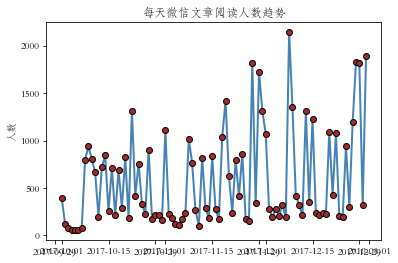

In [7]:
#==============================================================================
# 4.3 调整刻度轴
#==============================================================================
wechat = pd.read_excel('wechat.xlsx')
# 绘制单条折线图
plt.plot(wechat.Date, # x轴数据
         wechat.Counts, # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 折线图中添加圆点
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='brown') # 点的填充色
# 添加y轴标签
plt.ylabel('人数')
# 添加图形标题
plt.title('每天微信文章阅读人数趋势')
# 显示图形
plt.show()

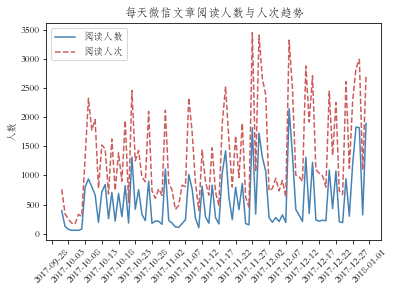

In [8]:
# 绘制阅读人数折线图
plt.plot(wechat.Date, # x轴数据
         wechat.Counts, # y轴数据
         linestyle = '-', # 折线类型，实心线
         color = 'steelblue', # 折线颜色
         label = '阅读人数')
# 绘制阅读人次折线图
plt.plot(wechat.Date, # x轴数据
         wechat.Times, # y轴数据
         linestyle = '--', # 折线类型，虚线
         color = 'indianred', # 折线颜色
         label = '阅读人次')
import matplotlib as mpl
# 获取图的坐标信息
ax = plt.gca()
# 设置日期的显示格式
date_format = mpl.dates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_format)
# 设置x轴显示多少个日期刻度
#xlocator = mpl.ticker.LinearLocator(10)
# 设置x轴每个刻度的间隔天数
xlocator = mpl.ticker.MultipleLocator(5)
ax.xaxis.set_major_locator(xlocator)
# 为了避免x轴刻度标签的紧凑，将刻度标签旋转45度
plt.xticks(rotation=45)
# 添加y轴标签
plt.ylabel('人数')
# 添加图形标题
plt.title('每天微信文章阅读人数与人次趋势')
# 添加图例
plt.legend()
# 显示图形
plt.show()

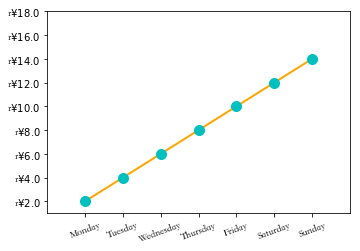

In [9]:
# # # 货币和时间序列样式的刻度标签
from calendar import month_name, day_name
from matplotlib.ticker import FormatStrFormatter
fig = plt.figure()
ax = fig.add_axes([0.2,0.2,0.7,0.7])
x = np.arange(1,8,1)
y = 2*x
ax.plot(x,y,ls='-',lw=2,color='orange',marker='o',ms=10,mfc='c',mec='c')
ax.yaxis.set_major_formatter(FormatStrFormatter('r$\yen%1.1f$'))
plt.xticks(x,day_name[0:7],rotation=20)
ax.set_xlim(0,8)
ax.set_ylim(1,18)
plt.show()

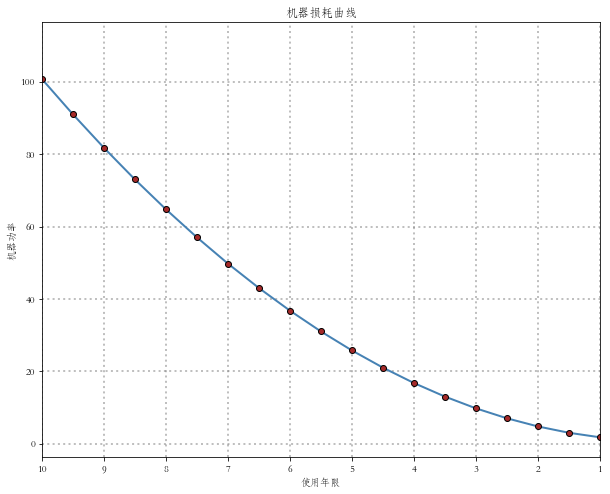

In [10]:
# # # 逆序坐标轴
time = np.arange(1,11,0.5)
machinepower = np.power(time,2) + 0.8
fig = plt.figure(figsize=(10,8))
plt.plot(time,machinepower,
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
         color = 'steelblue', # 折线颜色
         marker = 'o', # 折线图中添加圆点
         markersize = 6, # 点的大小
         markeredgecolor='black', # 点的边框色
         markerfacecolor='brown') # 点的填充色
plt.xlim(10,1)
plt.xlabel('使用年限')
plt.ylabel('机器功率')
plt.title('机器损耗曲线')
plt.grid(ls=":",lw=2,color='gray',alpha=0.5)
plt.show()

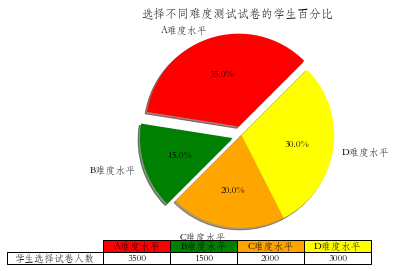

In [11]:
#==============================================================================
# 4.4 向图形添加统计表格
#==============================================================================
labels =["A难度水平",'B难度水平','C难度水平','D难度水平']
students = [0.35,0.15,0.20,0.30]
colors = ['red','green','orange','yellow']
explode = (0.1,0.1,0,0)
plt.pie(students,explode = explode,labels =labels,autopct='%1.1f%%',startangle=45,shadow=True,
        colors=colors)
# 设置x，y轴刻度一致，这样饼图才能是圆的
plt.axis('equal')
plt.title('选择不同难度测试试卷的学生百分比')
# 添加表格
col_labels = ["A难度水平",'B难度水平','C难度水平','D难度水平']
row_labels = ['学生选择试卷人数']
table_vals = np.array([3500,1500,2000,3000]).reshape(1,-1)
col_colors = ['red','green','orange','yellow']
my_table = plt.table(cellText=table_vals,cellLoc='center' ,colWidths=[0.2] * 4,
   rowLabels=row_labels, colLabels=col_labels,colColours=col_colors, rowLoc='center',loc='bottom')
plt.show()

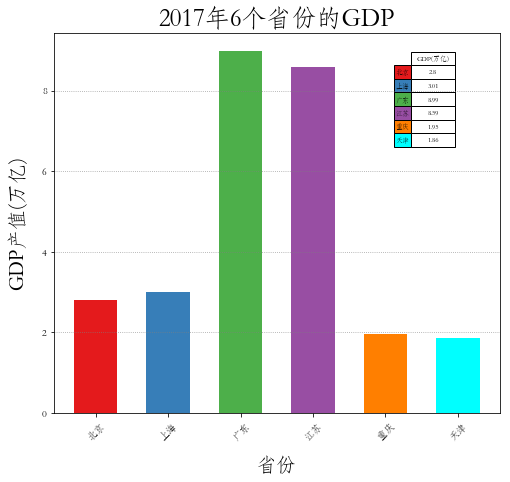

In [12]:
# # #柱状图中插入表格
GDP = pd.read_excel('Province GDP 2017.xlsx')
colors= ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#00FFFF']
fig =plt.figure(figsize=(8,7)) # 创建画布
plt.bar(GDP.index.values,GDP.GDP,width=0.6,align='center',color= colors,
        tick_label=GDP.Province)
plt.xticks(rotation=45)
plt.xlabel('省份',fontsize = 20,labelpad =15)
plt.ylabel('GDP产值(万亿)',fontsize = 20,labelpad =15)
plt.grid(True,axis='y',ls=':',color='gray',alpha=0.8)
plt.title('2017年6个省份的GDP',fontsize = 25)
# 添加表格
col_labels = ['GDP(万亿)']
row_labels = GDP.Province
table_vals =np.array(GDP.GDP.values).reshape(-1,1)
col_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#00FFFF']
my_table = plt.table(cellText=table_vals,cellLoc='center' ,colWidths=[0.1] * 6,
   rowLabels=row_labels, colLabels=col_labels,rowColours=col_colors,bbox=[0.8,0.7,0.1,0.25])
plt.show()